In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
% matplotlib inline
plt.style.use('ggplot')

## 1. Load Data

In [3]:
df_train = pd.read_csv('train_ajEneEa.csv')
df_test = pd.read_csv('test_v2akXPA.csv')

In [4]:
df_full = pd.concat([df_train, df_test], ignore_index=True)

In [5]:
df_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [6]:
df_test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [7]:
df_full.head()

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,stroke,work_type
0,Rural,3.0,95.12,18.0,No,Male,0,0,30669,NaN,0.0,children
1,Urban,58.0,87.96,39.2,Yes,Male,0,1,30468,never smoked,0.0,Private
2,Urban,8.0,110.89,17.6,No,Female,0,0,16523,NaN,0.0,Private
3,Rural,70.0,69.04,35.9,Yes,Female,0,0,56543,formerly smoked,0.0,Private
4,Rural,14.0,161.28,19.1,No,Male,0,0,46136,NaN,0.0,Never_worked


In [8]:
print('Train dataset size:', df_train.shape, 'Test dataset size:', df_test.shape)
print('Total:', df_full.shape)

Train dataset size: (43400, 12) Test dataset size: (18601, 11)
Total: (62001, 12)


## 2. Data Exploration

In [9]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62001 entries, 0 to 62000
Data columns (total 12 columns):
Residence_type       62001 non-null object
age                  62001 non-null float64
avg_glucose_level    62001 non-null float64
bmi                  59948 non-null float64
ever_married         62001 non-null object
gender               62001 non-null object
heart_disease        62001 non-null int64
hypertension         62001 non-null int64
id                   62001 non-null int64
smoking_status       42958 non-null object
stroke               43400 non-null float64
work_type            62001 non-null object
dtypes: float64(4), int64(3), object(5)
memory usage: 5.7+ MB


Missing values exist in feature "bmi" and "smoking_status".

In [10]:
df_train.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [11]:
df_test.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

Check values for each features.

In [12]:
for i in range(1,11):
    print(df_full[df_train.columns[i]].value_counts())
    print('\n')

Female    36622
Male      25366
Other        13
Name: gender, dtype: int64


51.00    1021
52.00    1011
78.00    1005
53.00     992
50.00     989
57.00     982
47.00     969
49.00     957
46.00     950
56.00     942
55.00     938
54.00     933
45.00     925
44.00     912
48.00     907
58.00     907
59.00     902
60.00     889
79.00     880
40.00     874
61.00     868
43.00     864
38.00     853
42.00     846
62.00     844
63.00     838
41.00     824
39.00     822
31.00     804
29.00     797
         ... 
75.00     507
73.00     496
77.00     491
76.00     484
11.00     454
10.00     450
6.00      375
1.64       89
1.56       88
0.72       84
0.80       84
1.80       83
1.08       82
1.48       80
1.32       76
0.64       75
1.40       75
1.72       74
0.56       73
1.16       72
0.88       70
1.88       68
0.32       68
0.48       68
0.24       66
1.24       64
1.00       54
0.40       52
0.16       46
0.08       27
Name: age, Length: 104, dtype: int64


0    56207
1     5794
Name: hy

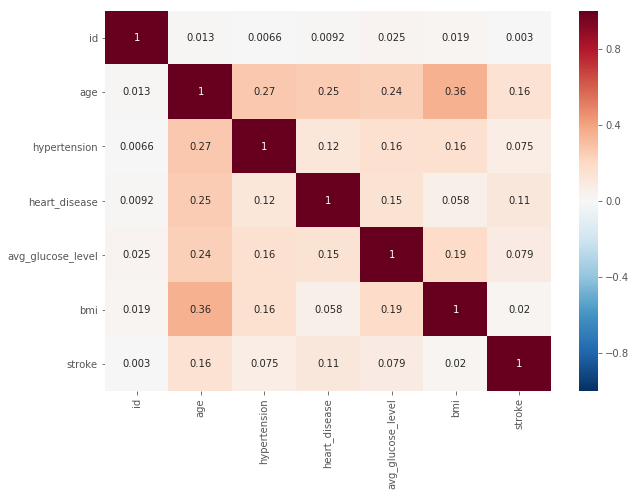

In [13]:
correlation = df_train.corr()
plt.figure(figsize=(10,7))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

Check the ratio of labels. This is a highly imbalanced problem.

<function matplotlib.pyplot.show>

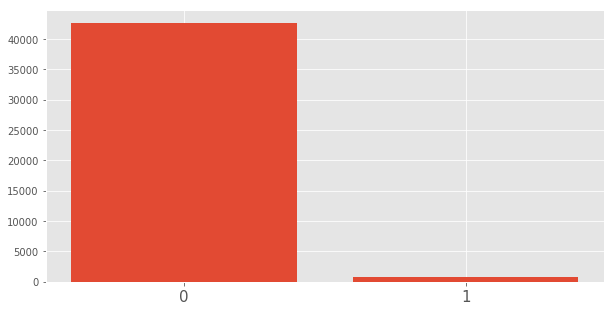

In [14]:
fig = plt.figure(figsize=(10,5))
plt.bar(df_train['stroke'].value_counts().index, df_train['stroke'].value_counts().values)
plt.xticks(df_train['stroke'].value_counts().index, fontsize=15)
plt.show

In [15]:
df_train['stroke'].value_counts()/df_train.shape[0]

0    0.981959
1    0.018041
Name: stroke, dtype: float64

## 3. Feature engineering 

In [16]:
feat_num = ['age', 'avg_glucose_level', 'bmi']
feat_cat = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

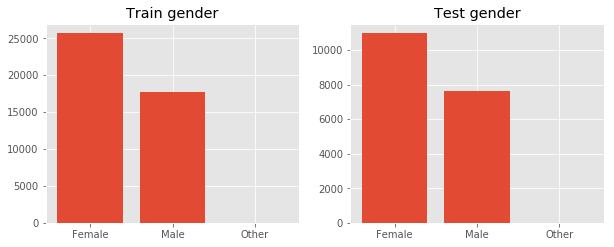

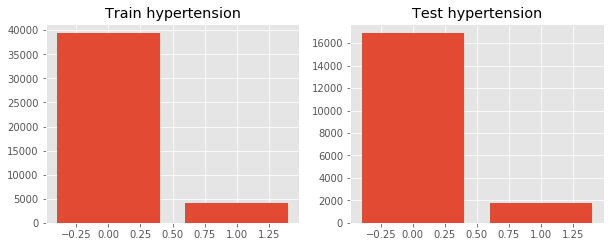

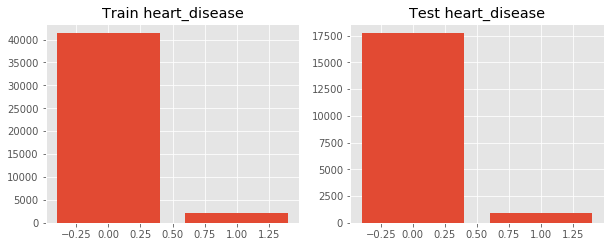

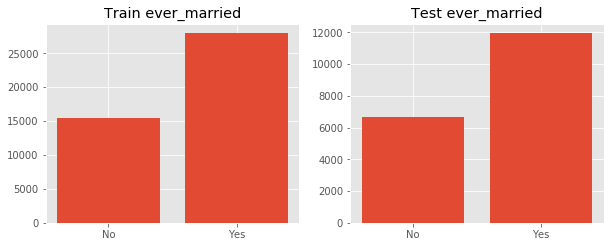

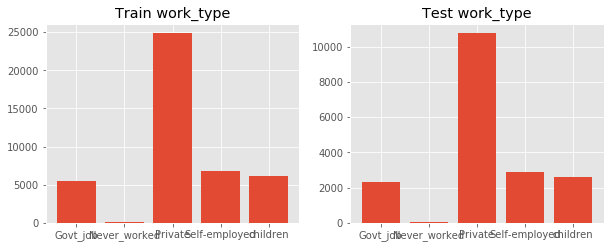

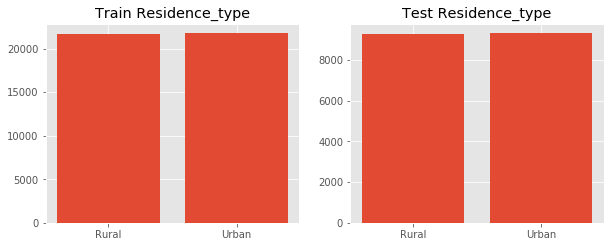

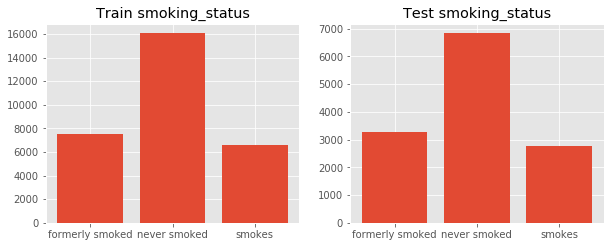

In [17]:
count = 1
for i in range(len(feat_cat)):
    fig = plt.figure(figsize=(10,30))
    plt.subplot(len(feat_cat),2,count)
    plt.bar(df_train[feat_cat[i]].value_counts().index, df_train[feat_cat[i]].value_counts().values)
    plt.title("Train "+feat_cat[i])
    
    plt.subplot(len(feat_cat),2,count+1)
    plt.bar(df_test[feat_cat[i]].value_counts().index, df_test[feat_cat[i]].value_counts().values)
    plt.title("Test "+feat_cat[i])
    count+=2

Since there are more females than males, we can replace 'other' in gender to be female. Then One-hot-enconding for features gender, ever_married, work_type and Residence_type. 

**Gender**

In [18]:
df_full['gender'].replace('Other', 'Female', inplace=True)
df_full['gender'].value_counts()

Female    36635
Male      25366
Name: gender, dtype: int64

**One Hot encoding**

In [19]:
dummy_feat = ['gender', 'ever_married', 'work_type', 'Residence_type']
df_dummy = pd.get_dummies(df_full[dummy_feat])

In [20]:
df_dummy.shape

(62001, 11)

In [21]:
df_dummy.head()

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,0,1,1,0,0,0,0,0,1,1,0
1,0,1,0,1,0,0,1,0,0,0,1
2,1,0,1,0,0,0,1,0,0,0,1
3,1,0,0,1,0,0,1,0,0,1,0
4,0,1,1,0,0,1,0,0,0,1,0


**Deal with age**

In [27]:
df_full['age'].describe()

count    62001.000000
mean        42.169475
std         22.522100
min          0.080000
25%         24.000000
50%         44.000000
75%         60.000000
max         82.000000
Name: age, dtype: float64

In [28]:
interval = 10

def get_age(age):
    # age is a float number   
    if age < 0:
        return 'NA'
    elif (age < interval):
        return interval
    elif (age <= interval * 2):
        return interval*2
    elif (age <= interval * 3):
        return interval * 3
    elif (age <= interval * 4):
        return interval * 4
    elif (age <= interval * 5):
        return interval * 5
    elif (age <= interval * 6):
        return interval * 6
    elif (age <= interval * 7):
        return interval * 7
    elif (age <= interval * 8):
        return interval * 8
    elif (age <= interval * 9):
        return interval * 9
    else:
        return '100'

In [30]:
df_full['age'] = np.array([get_age(x) for x in df_full.age])
df_age = pd.get_dummies(df_full.age, prefix = 'age')

In [31]:
df_age.head()

,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,age_90
0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0


**Smoke**

In [32]:
smoke = df_full['smoking_status']
smoke.fillna(-1, inplace = True)

In [33]:
df_smoke = pd.get_dummies(smoke, prefix = 'smoke')
df_smoke.head()

,smoke_-1,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,1,0,0,0
1,0,0,1,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0


In [34]:
df_full['avg_glucose_level'].describe()

count    62001.000000
mean       104.453832
std         42.960537
min         55.000000
25%         77.540000
50%         91.660000
75%        112.120000
max        291.050000
Name: avg_glucose_level, dtype: float64

**bmi: fill the missing value with 999**

In [35]:
bmi = df_full['bmi']
bmi.fillna(999, inplace = True)

Data after pre-processing. 

In [36]:
df = pd.concat((df_dummy, df_age, bmi, df_smoke, df_full[['hypertension', 'heart_disease', 'avg_glucose_level', 'stroke']]), axis = 1)

In [37]:
df.head()

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,...,age_90,bmi,smoke_-1,smoke_formerly smoked,smoke_never smoked,smoke_smokes,hypertension,heart_disease,avg_glucose_level,stroke
0,0,1,1,0,0,0,0,0,1,1,...,0,18.0,1,0,0,0,0,0,95.12,0.0
1,0,1,0,1,0,0,1,0,0,0,...,0,39.2,0,0,1,0,1,0,87.96,0.0
2,1,0,1,0,0,0,1,0,0,0,...,0,17.6,1,0,0,0,0,0,110.89,0.0
3,1,0,0,1,0,0,1,0,0,1,...,0,35.9,0,1,0,0,0,0,69.04,0.0
4,0,1,1,0,0,1,0,0,0,1,...,0,19.1,1,0,0,0,0,0,161.28,0.0


## 4. Model

**Random Forest**

In [42]:
df_train = df[:df_train.shape[0]]
df_test = df[df_train.shape[0]:].drop(['stroke'], axis= 1)

In [43]:
from sklearn.model_selection import train_test_split
Y = df_train['stroke']
X = df_train.drop(['stroke'], axis= 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [44]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(class_weight = {0:1, 1:49})
RF = RF.fit(x_train, y_train)
RF_pred = RF.predict(x_test)
print (metrics.classification_report(y_test, RF_pred))
print('Accuracy score:', accuracy_score(y_test, RF_pred))

             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      8499
        1.0       0.06      0.01      0.01       181

avg / total       0.96      0.98      0.97      8680

Accuracy score: 0.9775345622119815


In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, RF_pred)

0.5018799741796077

**XGBoost**

In [46]:
import xgboost as xgb
dtrain = xgb.DMatrix(x_train, label=y_train, missing = np.NAN)

In [47]:
params = {"objective": "binary:logistic", 
          #"booster" : "gbtree", 
          "eta": 0.05, 
          "max_depth": 6, 
          "subsample": 0.632, 
          "colsample_bytree": 0.7,
          #"silent": 1, 
          "seed": 1234, 
          "eval_metric": "auc",
          "min_child_weight": 5,
          "gamma": 0} 

In [48]:
cv_results = xgb.cv(params, dtrain,
                    num_boost_round=1500,
                    nfold=5,
                    maximize=True, 
                    stratified=True,
                    shuffle=True,
                    verbose_eval=50,
                    seed=1234,
                    early_stopping_rounds=50)

[0]	train-auc:0.733137+0.0481118	test-auc:0.728639+0.0537538
[50]	train-auc:0.883317+0.00193148	test-auc:0.85477+0.0122893
[100]	train-auc:0.897553+0.00198947	test-auc:0.857492+0.00950417
[150]	train-auc:0.909018+0.00128786	test-auc:0.857171+0.00789444


In [49]:
best_score = cv_results['test-auc-mean'].max()
best_iteration = len(cv_results)
print('best score:', best_score, 'best iterations:', best_iteration)

best score: 0.8587966 best iterations: 127


In [51]:
%%time
scores = []
for max_depth in [3, 4, 5, 6, 7, 8, 9, 10]:

    params = dict()
    params['objective'] = 'binary:logistic'
    params['eta'] = 0.1
    params['max_depth'] = max_depth
    params['min_child_weight'] = 5
    params['colsample_bytree'] = 0.7
    params['subsample'] = 0.632
    params['gamma'] = 0
    params['seed'] = 1234
    params['eval_metric'] = 'auc'
    cv_results = xgb.cv(params, dtrain,
                    num_boost_round=1500,
                    nfold=5,
                    maximize=True, 
                    stratified=True,
                    shuffle=True,
                    verbose_eval=200,
                    seed=1234,
                    early_stopping_rounds=50)

    
    best_score = cv_results['test-auc-mean'].max()
    best_iteration = len(cv_results)           
    print(max_depth, best_score, best_iteration)
    scores.append([best_score, params['eta'], params['max_depth'], params['min_child_weight'],
                   params['colsample_bytree'], params['subsample'], params['gamma'], best_iteration])

scores = pd.DataFrame(scores, columns=['score', 'eta', 'max_depth', 'min_child_weight',
                                       'colsample_bytree', 'subsample', 'gamma', 'best_iteration'])
best_max_depth = scores.sort_values(by='score', ascending=False)['max_depth'].values[0]
print('Best max_depth is', best_max_depth)  

[0]	train-auc:0.71706+0.0346647	test-auc:0.714655+0.0396844
3 0.8579794 73
[0]	train-auc:0.733128+0.048106	test-auc:0.728648+0.0537621
4 0.8590682000000001 64
[0]	train-auc:0.733137+0.0481118	test-auc:0.728639+0.0537538
5 0.8559602 63
[0]	train-auc:0.733137+0.0481118	test-auc:0.728639+0.0537538
6 0.8561714 60
[0]	train-auc:0.733137+0.0481118	test-auc:0.728639+0.0537538
7 0.8543464000000001 57
[0]	train-auc:0.733137+0.0481118	test-auc:0.728639+0.0537538
8 0.8527528 36
[0]	train-auc:0.733137+0.0481118	test-auc:0.728639+0.0537538
9 0.8533430000000001 36
[0]	train-auc:0.733137+0.0481118	test-auc:0.728639+0.0537538
10 0.8536612 36
Best max_depth is 4
CPU times: user 2min 59s, sys: 8.72 s, total: 3min 8s
Wall time: 1min 8s


In [52]:
%%time
scores = []
for min_child_weight in [1, 5, 10, 15, 25, 35, 50, 100]:

    params = dict()
    params['objective'] = 'binary:logistic'
    params['eta'] = 0.1
    params['max_depth'] = best_max_depth
    params['min_child_weight'] = min_child_weight
    params['colsample_bytree'] = 0.7
    params['subsample'] = 0.632
    params['gamma'] = 0
    params['seed'] = 1234
    params['eval_metric'] = 'auc'
    cv_results = xgb.cv(params, dtrain,
                    num_boost_round=1500,
                    nfold=5,
                    maximize=True, 
                    stratified=True,
                    shuffle=True,
                    verbose_eval=200,
                    seed=1234,
                    early_stopping_rounds=50)

    
    best_score = cv_results['test-auc-mean'].max()
    best_iteration = len(cv_results)           
    print(min_child_weight, best_score, best_iteration)
    scores.append([best_score, params['eta'], params['max_depth'], params['min_child_weight'],
                   params['colsample_bytree'], params['subsample'], params['gamma'], best_iteration])

scores = pd.DataFrame(scores, columns=['score', 'eta', 'max_depth', 'min_child_weight',
                                       'colsample_bytree', 'subsample', 'gamma', 'best_iteration'])
best_min_child_weight = scores.sort_values(by='score', ascending=False)['min_child_weight'].values[0]
print('Best min_child_weight is', best_min_child_weight)    

[0]	train-auc:0.726229+0.0440128	test-auc:0.723291+0.0485386
1 0.8586782 79
[0]	train-auc:0.733128+0.048106	test-auc:0.728648+0.0537621
5 0.8590682000000001 64
[0]	train-auc:0.73287+0.0479952	test-auc:0.728235+0.0537521
10 0.8573407999999999 59
[0]	train-auc:0.732862+0.0479888	test-auc:0.728235+0.0537567
15 0.8554269999999999 53
[0]	train-auc:0.732862+0.0479888	test-auc:0.728235+0.0537567
25 0.8534633999999999 33
[0]	train-auc:0.732796+0.0479345	test-auc:0.728114+0.05373
35 0.8505255999999999 27
[0]	train-auc:0.731763+0.0470852	test-auc:0.726866+0.0528376
50 0.8480603999999999 17
[0]	train-auc:0.719688+0.0366335	test-auc:0.71132+0.0364544
100 0.8350718 16
Best min_child_weight is 5
CPU times: user 1min 57s, sys: 5.96 s, total: 2min 3s
Wall time: 49 s


In [53]:
%%time
scores = []
for colsample_bytree in [0.1, 0.3, 0.5, 0.7, 0.9]:

    params = dict()
    params['objective'] = 'binary:logistic'
    params['eta'] = 0.1
    params['max_depth'] = best_max_depth
    params['min_child_weight'] = best_min_child_weight
    params['colsample_bytree'] = colsample_bytree
    params['subsample'] = 0.632
    params['gamma'] = 0
    params['seed'] = 1234
    params['eval_metric'] = 'auc'
    cv_results = xgb.cv(params, dtrain,
                    num_boost_round=1500,
                    nfold=5,
                    maximize=True, 
                    stratified=True,
                    shuffle=True,
                    verbose_eval=200,
                    seed=1234,
                    early_stopping_rounds=50)

    
    best_score = cv_results['test-auc-mean'].max()
    best_iteration = len(cv_results)           
    print(colsample_bytree, best_score, best_iteration)
    scores.append([best_score, params['eta'], params['max_depth'], params['min_child_weight'],
                   params['colsample_bytree'], params['subsample'], params['gamma'], best_iteration])

scores = pd.DataFrame(scores, columns=['score', 'eta', 'max_depth', 'min_child_weight',
                                       'colsample_bytree', 'subsample', 'gamma', 'best_iteration'])
best_colsample_bytree = scores.sort_values(by='score', ascending=False)['colsample_bytree'].values[0]
print('Best colsample_bytree is', best_colsample_bytree)    

[0]	train-auc:0.585165+0.0712102	test-auc:0.583558+0.0707285
[200]	train-auc:0.873004+0.00159024	test-auc:0.850049+0.00918731
0.1 0.850525 230
[0]	train-auc:0.675338+0.0108976	test-auc:0.677011+0.0172089
0.3 0.8576 82
[0]	train-auc:0.720691+0.0502654	test-auc:0.720826+0.0562123
0.5 0.8581434 63
[0]	train-auc:0.733128+0.048106	test-auc:0.728648+0.0537621
0.7 0.8590682000000001 64
[0]	train-auc:0.768664+0.0161337	test-auc:0.759762+0.0184572
0.9 0.8566048 64
Best colsample_bytree is 0.7
CPU times: user 1min 24s, sys: 5.1 s, total: 1min 29s
Wall time: 35.8 s


In [54]:
%%time
scores = []
for subsample in [0.1, 0.3, 0.5, 0.7, 0.9]:

    params = dict()
    params['objective'] = 'binary:logistic'
    params['eta'] = 0.1
    params['max_depth'] = best_max_depth
    params['min_child_weight'] = best_min_child_weight
    params['colsample_bytree'] = best_colsample_bytree
    params['subsample'] = subsample 
    params['gamma'] = 0
    params['seed'] = 1234
    params['eval_metric'] = 'auc'
    cv_results = xgb.cv(params, dtrain,
                    num_boost_round=1500,
                    nfold=5,
                    maximize=True, 
                    stratified=True,
                    shuffle=True,
                    verbose_eval=200,
                    seed=1234,
                    early_stopping_rounds=50)

    
    best_score = cv_results['test-auc-mean'].max()
    best_iteration = len(cv_results)           
    print(subsample, best_score, best_iteration)
    scores.append([best_score, params['eta'], params['max_depth'], params['min_child_weight'],
                   params['colsample_bytree'], params['subsample'], params['gamma'], best_iteration])

scores = pd.DataFrame(scores, columns=['score', 'eta', 'max_depth', 'min_child_weight',
                                       'colsample_bytree', 'subsample', 'gamma', 'best_iteration'])
best_subsample = scores.sort_values(by='score', ascending=False)['subsample'].values[0]
print('Best subsample is', best_subsample)    

[0]	train-auc:0.597002+0.0565956	test-auc:0.591315+0.0646162
0.1 0.8430114 33
[0]	train-auc:0.686833+0.0686352	test-auc:0.682715+0.0750874
0.3 0.8536206 58
[0]	train-auc:0.697258+0.0602126	test-auc:0.6966+0.0656014
0.5 0.8576594 63
[0]	train-auc:0.725896+0.0554871	test-auc:0.728475+0.0548121
0.7 0.8584102 69
[0]	train-auc:0.752084+0.0258205	test-auc:0.745534+0.0380825
0.9 0.8599600000000001 70
Best subsample is 0.9
CPU times: user 1min 16s, sys: 4.21 s, total: 1min 20s
Wall time: 31 s


In [55]:
%%time
scores = []
for gamma in [0, 0.5, 1, 1.5, 2]:

    params = dict()
    params['objective'] = 'binary:logistic'
    params['eta'] = 0.1
    params['max_depth'] = best_max_depth
    params['min_child_weight'] = best_min_child_weight
    params['colsample_bytree'] = best_colsample_bytree
    params['subsample'] = best_subsample 
    params['gamma'] = gamma
    params['seed'] = 1234
    params['eval_metric'] = 'auc'
    cv_results = xgb.cv(params, dtrain,
                    num_boost_round=1500,
                    nfold=5,
                    maximize=True, 
                    stratified=True,
                    shuffle=True,
                    verbose_eval=200,
                    seed=1234,
                    early_stopping_rounds=50)

    
    best_score = cv_results['test-auc-mean'].max()
    best_iteration = len(cv_results)           
    print(gamma, best_score, best_iteration)
    scores.append([best_score, params['eta'], params['max_depth'], params['min_child_weight'],
                   params['colsample_bytree'], params['subsample'], params['gamma'], best_iteration])

scores = pd.DataFrame(scores, columns=['score', 'eta', 'max_depth', 'min_child_weight',
                                       'colsample_bytree', 'subsample', 'gamma', 'best_iteration'])
best_gamma = scores.sort_values(by='score', ascending=False)['gamma'].values[0]
print('Best gamma is', best_gamma)    

[0]	train-auc:0.752084+0.0258205	test-auc:0.745534+0.0380825
0 0.8599600000000001 70
[0]	train-auc:0.737433+0.0460626	test-auc:0.734382+0.047561
0.5 0.8600097999999999 70
[0]	train-auc:0.710766+0.0410825	test-auc:0.714852+0.0389352
1 0.8598122 61
[0]	train-auc:0.710557+0.0413408	test-auc:0.714705+0.0390902
1.5 0.8604125999999999 70
[0]	train-auc:0.710186+0.0409678	test-auc:0.714679+0.0390841
2 0.8602816000000001 69
Best gamma is 1.5
CPU times: user 1min 22s, sys: 4.55 s, total: 1min 26s
Wall time: 33 s


In [56]:
print(best_max_depth, best_min_child_weight,
      best_colsample_bytree, best_subsample, best_gamma)

scores.sort_values(by='score',ascending=False)

4 5 0.7 0.9 1.5


,score,eta,max_depth,min_child_weight,colsample_bytree,subsample,gamma,best_iteration
3,0.860413,0.1,4,5,0.7,0.9,1.5,70
4,0.860282,0.1,4,5,0.7,0.9,2.0,69
1,0.860010,0.1,4,5,0.7,0.9,0.5,70
0,0.859960,0.1,4,5,0.7,0.9,0.0,70
2,0.859812,0.1,4,5,0.7,0.9,1.0,61


In [57]:
xgb_params = dict()
xgb_params['objective'] = 'binary:logistic'
xgb_params['eta'] = 0.05
xgb_params['max_depth'] = best_max_depth
xgb_params['min_child_weight'] = best_min_child_weight
xgb_params['colsample_bytree'] = best_colsample_bytree
xgb_params['subsample'] = best_subsample 
xgb_params['gamma'] = best_gamma
xgb_params['seed'] = 1234
xgb_params['eval_metric'] = 'auc'
cv_results = xgb.cv(params, dtrain,
                num_boost_round=1500,
                nfold=5,
                maximize=True, 
                stratified=True,
                shuffle=True,
                verbose_eval=200,
                seed=1234,
                early_stopping_rounds=50)

best_score = cv_results['test-auc-mean'].max()
best_iteration = len(cv_results)           
print(best_score, best_iteration)

[0]	train-auc:0.710186+0.0409678	test-auc:0.714679+0.0390841
0.8602816000000001 69


In [58]:
xgb_model = xgb.train(xgb_params,
                  dtrain,
                  num_boost_round=best_iteration)

In [59]:
dtest = xgb.DMatrix(x_test, missing = np.NAN)
xgb_pred = xgb_model.predict(dtest)

In [60]:
roc_auc_score(y_test, xgb_pred)

0.8503990394710068

In [61]:
df_test1 = xgb.DMatrix(df_test, missing = np.NAN)

In [62]:
pred1 = xgb_model.predict(df_test1)

In [63]:
y2 = pd.DataFrame(pred1, columns=['stroke'])

In [64]:
df_test = pd.read_csv('test_v2akXPA.csv')
df_id = pd.DataFrame(df_test['id']).reset_index().drop(['index'], axis=1)
predict_data = pd.concat([df_id, y2], axis=1)
predict_data.to_csv('Submmission3.csv', index=False)